In [1]:
import pandas as ps
import zipfile
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import matplotlib.pyplot as plt
import seaborn as sns
from keras.layers import Dense, SimpleRNN
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df=ps.read_csv(r"C:\Users\Harshit\Downloads\165890546209560ec2379f8793842aa5b168a_\PGA Wkend DL Exam\Datasets\RNN\tweets_train.csv")

In [3]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source,is_retweet,clean_text,Sentiment
0,Romy 👑,Bolton - England,"Tables turn, bridges burn, you live and learn.",2009-06-15 09:00:39,525,896,3854,False,2020-09-19 15:19:32,['TheSocialDilemma'],Twitter for Android,False,TheSocialDilemma is an eye opener isn t it ple...,Neutral
1,TLynn Peterson,"Black Canyon City, Arizona",Acquired disability ♿ after an accident. Livin...,2013-05-29 00:17:46,5045,5374,48152,False,2020-09-13 00:31:46,['TheSocialDilemma'],Twitter for Android,False,TheSocialDilemma If we don t agree on what is ...,Positive
2,Rutger Kosters,Netherlands,Cloud Solution Architect @NetApp | VCDX #209 |...,2014-10-07 09:34:10,574,251,1070,False,2020-09-09 21:10:33,['TheSocialDilemma'],Twitter for Android,False,Watching TheSocialDilemma scary to see social ...,Negative
3,IDFWU🗯🇿🇼🇿🇦,"East London, South Africa","YOU HAVE OPTIONS, YOU CAN’T JUST TAKE WHAT LIF...",2012-08-22 11:09:06,706,618,1320,False,2020-09-11 04:33:08,NaN,Twitter for Android,False,You check your social media before you pee in ...,Positive
4,Treebel,NaN,NaN,2010-09-25 07:25:31,9,13,55,False,2020-09-17 16:27:38,['thesocialdilemma'],Twitter for iPhone,False,watch thesocialdilemma and see what s actually...,Negative


In [4]:
df.isnull().sum()/len(df)*100

user_name            0.005882
user_location       21.217647
user_description     6.835294
user_created         0.000000
user_followers       0.000000
user_friends         0.000000
user_favourites      0.000000
user_verified        0.000000
date                 0.000000
hashtags            21.464706
source               0.000000
is_retweet           0.000000
clean_text           0.047059
Sentiment            0.000000
dtype: float64

In [5]:
df.dropna(inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9911 entries, 0 to 16999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_name         9911 non-null   object
 1   user_location     9911 non-null   object
 2   user_description  9911 non-null   object
 3   user_created      9911 non-null   object
 4   user_followers    9911 non-null   int64 
 5   user_friends      9911 non-null   int64 
 6   user_favourites   9911 non-null   int64 
 7   user_verified     9911 non-null   bool  
 8   date              9911 non-null   object
 9   hashtags          9911 non-null   object
 10  source            9911 non-null   object
 11  is_retweet        9911 non-null   bool  
 12  clean_text        9911 non-null   object
 13  Sentiment         9911 non-null   object
dtypes: bool(2), int64(3), object(9)
memory usage: 1.0+ MB


In [7]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source,is_retweet,clean_text,Sentiment
0,Romy 👑,Bolton - England,"Tables turn, bridges burn, you live and learn.",2009-06-15 09:00:39,525,896,3854,False,2020-09-19 15:19:32,['TheSocialDilemma'],Twitter for Android,False,TheSocialDilemma is an eye opener isn t it ple...,Neutral
1,TLynn Peterson,"Black Canyon City, Arizona",Acquired disability ♿ after an accident. Livin...,2013-05-29 00:17:46,5045,5374,48152,False,2020-09-13 00:31:46,['TheSocialDilemma'],Twitter for Android,False,TheSocialDilemma If we don t agree on what is ...,Positive
2,Rutger Kosters,Netherlands,Cloud Solution Architect @NetApp | VCDX #209 |...,2014-10-07 09:34:10,574,251,1070,False,2020-09-09 21:10:33,['TheSocialDilemma'],Twitter for Android,False,Watching TheSocialDilemma scary to see social ...,Negative
6,Ekta :),India ❤,Workaholic🙊IMTian👩‍🎓 Former Intern at Tata Ste...,2012-10-21 11:15:31,296,97,15812,False,2020-09-17 19:29:24,['TheSocialDilemma'],Twitter for Android,False,Watching TheSocialDilemma Let s see how it can...,Neutral
8,elleghie16😇🍀,Republic of the Philippines,do your Best and God will do the rest🙏🙏🙏,2018-12-02 17:19:12,253,3885,9968,False,2020-09-14 16:50:47,['TheSocialDilemma'],Twitter for Android,False,There are only two industries that call their ...,Negative


In [8]:
df.shape

(9911, 14)

In [9]:
df.isnull().sum()

user_name           0
user_location       0
user_description    0
user_created        0
user_followers      0
user_friends        0
user_favourites     0
user_verified       0
date                0
hashtags            0
source              0
is_retweet          0
clean_text          0
Sentiment           0
dtype: int64

In [10]:
df.Sentiment.value_counts()

Sentiment
Positive    4363
Neutral     3923
Negative    1625
Name: count, dtype: int64

In [11]:
tweets = df["clean_text"].values
labels = df["Sentiment"].values

In [12]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tweets)
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1

In [13]:
sequences = tokenizer.texts_to_sequences(tweets)
max_sequence_len = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_len)

In [14]:
labels = ps.get_dummies(labels).values

In [15]:
# Split data into training and testing sets
train_size = int(0.8 * len(padded_sequences))
x_train = padded_sequences[:train_size]
y_train = labels[:train_size]
x_test = padded_sequences[train_size:]
y_test = labels[train_size:]

In [16]:
# Step 2: Word Embeddings
embedding_dim = 100

In [17]:
# Step 3: Model Architecture
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_sequence_len))
model.add(SimpleRNN(64))
model.add(Dense(3, activation='softmax'))

In [18]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
# Step 4: Training
epochs = 10
batch_size = 32

248/248 [==============================] - 4s 11ms/step - loss: 0.8270 - accuracy: 0.6305


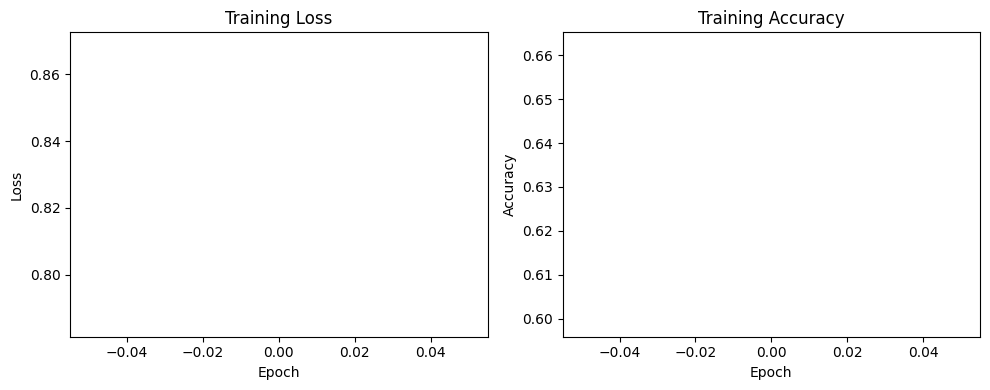

248/248 [==============================] - 3s 11ms/step - loss: 0.3197 - accuracy: 0.8890


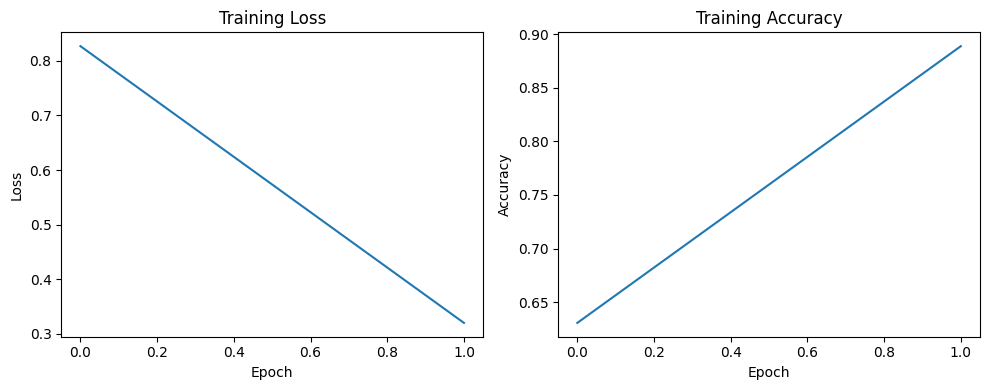

248/248 [==============================] - 3s 11ms/step - loss: 0.0946 - accuracy: 0.9709


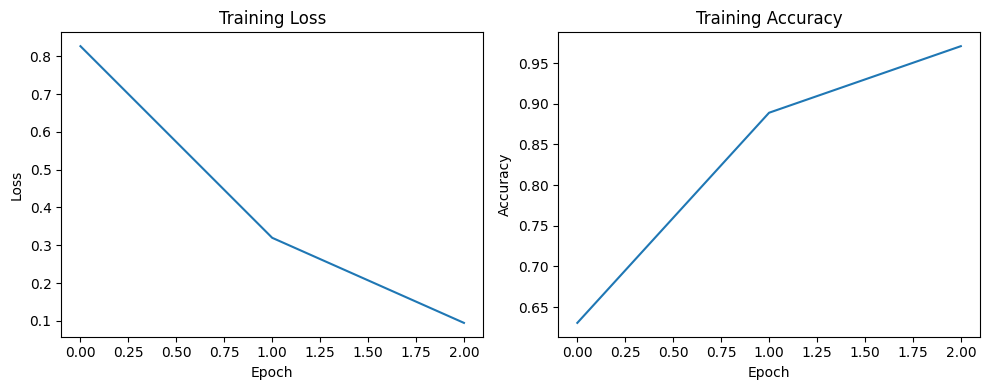

248/248 [==============================] - 3s 11ms/step - loss: 0.0297 - accuracy: 0.9938


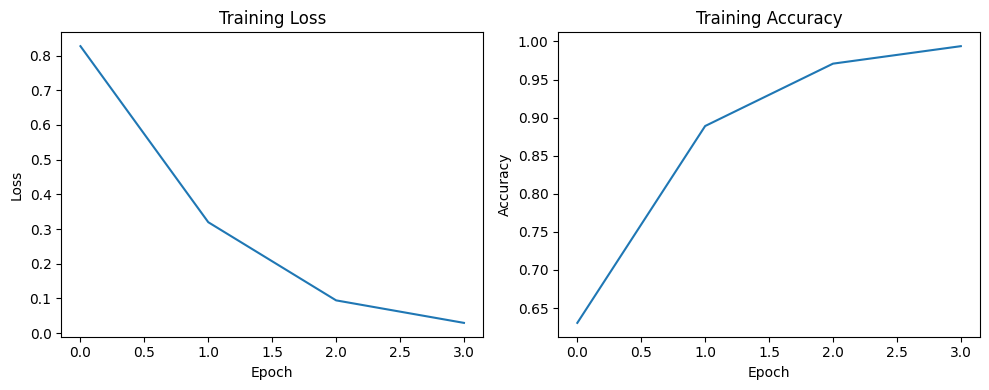

248/248 [==============================] - 3s 12ms/step - loss: 0.0111 - accuracy: 0.9984


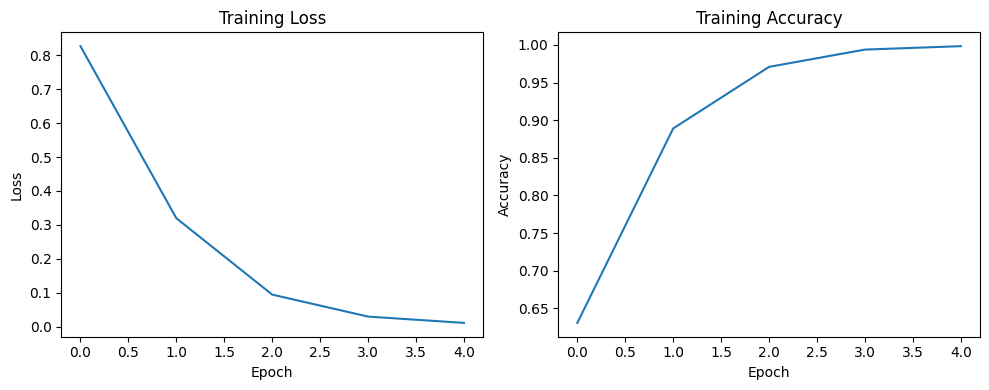

248/248 [==============================] - 3s 10ms/step - loss: 0.0051 - accuracy: 0.9994


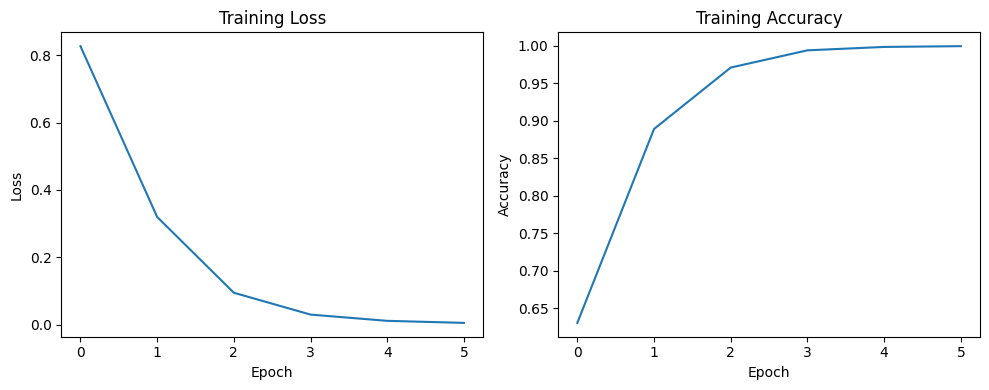

248/248 [==============================] - 3s 11ms/step - loss: 0.0027 - accuracy: 0.9997


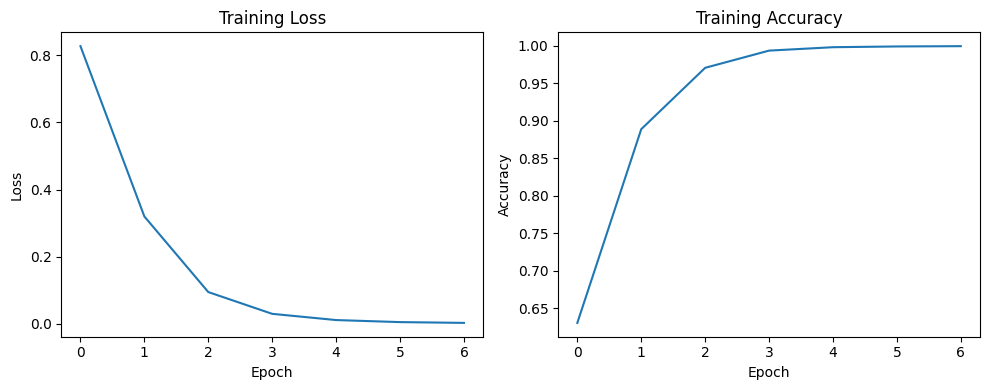

248/248 [==============================] - 3s 10ms/step - loss: 0.0018 - accuracy: 0.9999


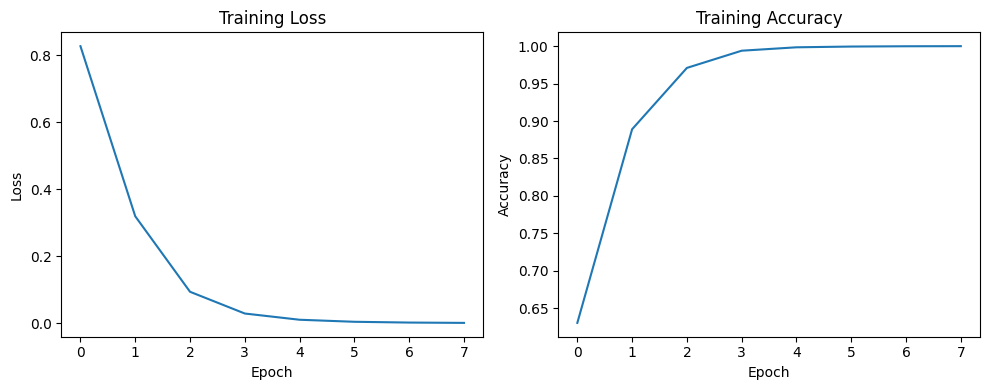

248/248 [==============================] - 3s 10ms/step - loss: 0.0032 - accuracy: 0.9991


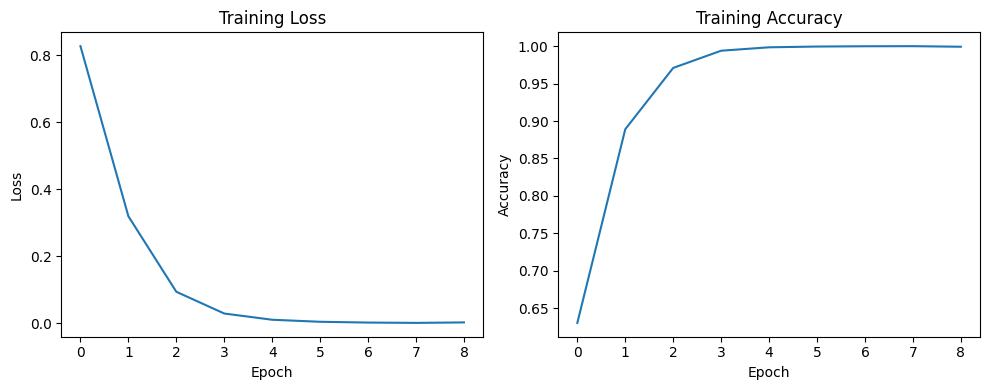

248/248 [==============================] - 3s 10ms/step - loss: 0.0028 - accuracy: 0.9992


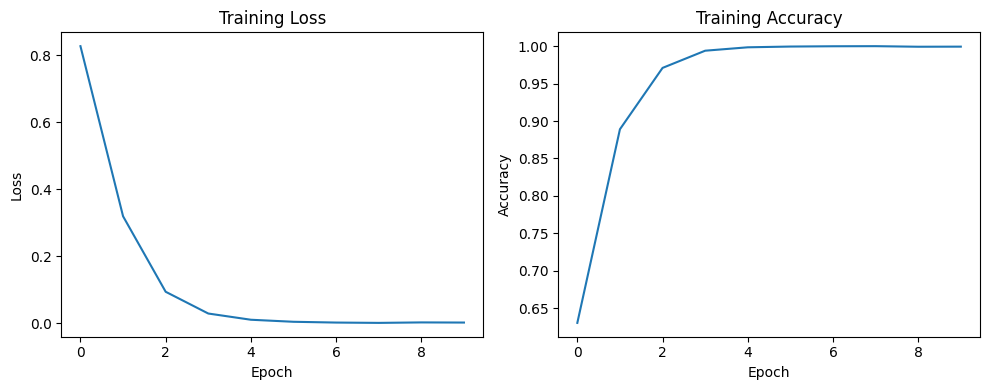

In [20]:
# Lists to store training history
loss_history = []
accuracy_history = []

for epoch in range(epochs):
    history = model.fit(x_train, y_train, epochs=1, batch_size=batch_size)
    
    loss = history.history['loss'][0]
    accuracy = history.history['accuracy'][0]
    
    loss_history.append(loss)
    accuracy_history.append(accuracy)
    
    # Plot training progress
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(loss_history)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    
    plt.subplot(1, 2, 2)
    plt.plot(accuracy_history)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training Accuracy')
    
    plt.tight_layout()
    plt.show()

In [21]:
# Step 5: Evaluation on Testing Dataset
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

62/62 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.8462
Test Loss: 0.6929610371589661
Test Accuracy: 0.8461926579475403


In [22]:
# Step 6: Prepare and Evaluate New Test Dataset
new_test_data =ps.read_csv(r"C:\Users\Harshit\Downloads\165890546209560ec2379f8793842aa5b168a_\PGA Wkend DL Exam\Datasets\RNN\tweets_test.csv")
new_test_tweets = new_test_data["clean_text"].astype(str).values

In [23]:
new_test_data.shape

(3068, 13)

In [24]:
new_test_data.dropna(inplace=True)

In [25]:
new_test_data.shape

(1822, 13)

In [33]:
new_test_data.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source,is_retweet,clean_text
0,Doug Webb,Probably Europe,"I develop methods for effective cooperation, w...",2015-12-12 15:22:58,157,228,496,False,2020-09-15 22:53:36,"['theSocialDilemma', 'joinMastodon']",Twitter Web App,False,Watch theSocialDilemma then joinMastodon
1,Dan Reynish,"Medicine Hat, Alberta",News Anchor at Noon and 5 pm on CHAT TV. Canad...,2011-09-10 12:17:10,1722,2500,13912,False,2020-09-12 04:43:03,['WeTheNorth'],Twitter Web App,False,With the 2019 2020 NBA season officially over ...
3,“IT IS WHAT IT IS.”🇰🇪🇳🇿🇺🇸,WA,Heliophile🌞☀️• #Rugby • Wildlifer • #HIV • #So...,2009-04-17 13:35:02,1143,2692,11999,False,2020-09-12 18:28:18,"['TheSocialDilemma', 'Netflix']",Twitter for iPhone,False,Have you watched TheSocialDilemma on Netflix
6,Massimo Gaspari,"Princeton, NJ",Astrophysicist at @Princeton University. Lyman...,2018-06-04 15:00:24,301,78,3777,False,2020-09-20 18:24:38,['Twitter'],Twitter Web App,False,Hey Twitter AIs out there do a healthy thing f...
7,Kieran Edward,Shanghai,PE Teacher inspired to share and learn from ot...,2016-09-18 17:49:57,96,111,43,False,2020-09-13 15:20:25,['TheSocialDilemma'],Twitter for Android,False,Just watched TheSocialDilemma appreciate the i...


In [26]:
new_sequences = tokenizer.texts_to_sequences(new_test_tweets)
new_padded_sequences = pad_sequences(new_sequences, maxlen=max_sequence_len)

In [27]:
predictions = model.predict(new_padded_sequences)
predicted_labels = np.argmax(predictions, axis=-1)

96/96 [==============================] - 0s 3ms/step


In [28]:
# Categorize the tweets into three sets
neutral_tweets = []
positive_tweets = []
negative_tweets = []

In [29]:
for tweet, label in zip(new_test_tweets, predicted_labels):
    if label == 0:
        neutral_tweets.append(tweet)
    elif label == 1:
        positive_tweets.append(tweet)
    else:
        negative_tweets.append(tweet)

62/62 [==============================] - 0s 3ms/step


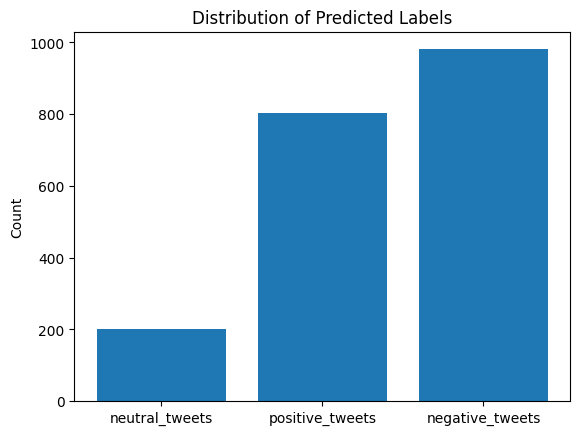

In [30]:
predicted_probabilities = model.predict(x_test)
predicted_labels = np.argmax(predicted_probabilities, axis=1)

# Calculate predicted label counts
predicted_label_counts = np.bincount(predicted_labels)

# Plot the distribution of predicted labels
categories = ['neutral_tweets', 'positive_tweets', 'negative_tweets']
plt.bar(categories, predicted_label_counts)
plt.ylabel('Count')
plt.title('Distribution of Predicted Labels')
plt.show()

In [31]:
# Print the categorized sets of tweets
print('Neutral Tweets:')
for tweet in neutral_tweets:
    print(tweet)

print('\nPositive Tweets:')
for tweet in positive_tweets:
    print(tweet)

print('\nNegative Tweets:')
for tweet in negative_tweets:
    print(tweet)

Neutral Tweets:
Just watched TheSocialDilemma appreciate the irony of posting after watching but definitely given me some ideas f
TheSocialDilemma Holy shit Must watch scary really scary
Highly recommend thesocialdilemma on thought provoking important entertaining amp terrifying We re lo
1 n Just finished watching TheSocialDilemma A documentary on Netflix There are only two industries that call th
watch TheSocialDilemma on Netflix very very scary but very informative
After watching TheSocialDilemma I am extremely self conscious and uncomfortable tweeting about it
I ve come on Social Media to say I watched The Social Dilemma I dont want to get lost I m guilty of bei
Watched TheSocialDilemma on Netflix last night You should too Two excerpts from it 1 Fake news spreads SI
They just flipped on the new and yes I hate it Everyone hates it I am so sick of being bombarded with
Fake news on twitter spreads six times faster than true news TheSocialDilemma
AcademicTwitter am I the only media rese

In [34]:
predicted_probabilities = model.predict(x_test)
predicted_labels = np.argmax(predicted_probabilities, axis=1)

y_true = np.argmax(y_test[:len(predicted_labels)], axis=1)
print("\nClassification Report:")
print(classification_report(y_true, predicted_labels))

loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

62/62 [==============================] - 0s 3ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.52      0.63       308
           1       0.87      0.90      0.88       774
           2       0.84      0.91      0.87       901

    accuracy                           0.85      1983
   macro avg       0.84      0.78      0.80      1983
weighted avg       0.84      0.85      0.84      1983

62/62 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.8462
Test Loss: 0.6929610371589661
Test Accuracy: 0.8461926579475403
